In [1]:
%run pokedex.py -f

Looks like your pokedex is already complete, well done!


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

font = {'family': 'sans-serif',
        'weight': 'normal',
        'size': 20}

label_font =  {'family': 'sans-serif',
               'weight': 'bold',
               'size': 24}

title_font =  {'family': 'sans-serif',
               'weight': 'bold',
               'size': 28}


matplotlib.rc('font', **font)

poketypes = ["Normal", "Fire", "Water", "Electric", "Grass", "Ice", "Fighting", "Poison", "Ground", 
             "Flying", "Psychic", "Bug", "Rock", "Ghost", "Dragon", "Dark", "Steel", "Fairy"]

In [3]:
pokedex = pd.read_csv("data/pokedex.csv", dtype = {"number": str})
pokedex.set_index("number", inplace = True)
pokedex.loc[pokedex["type2"] == "-", "type2"] = pokedex.loc[pokedex["type2"] == "-"]["type1"] 

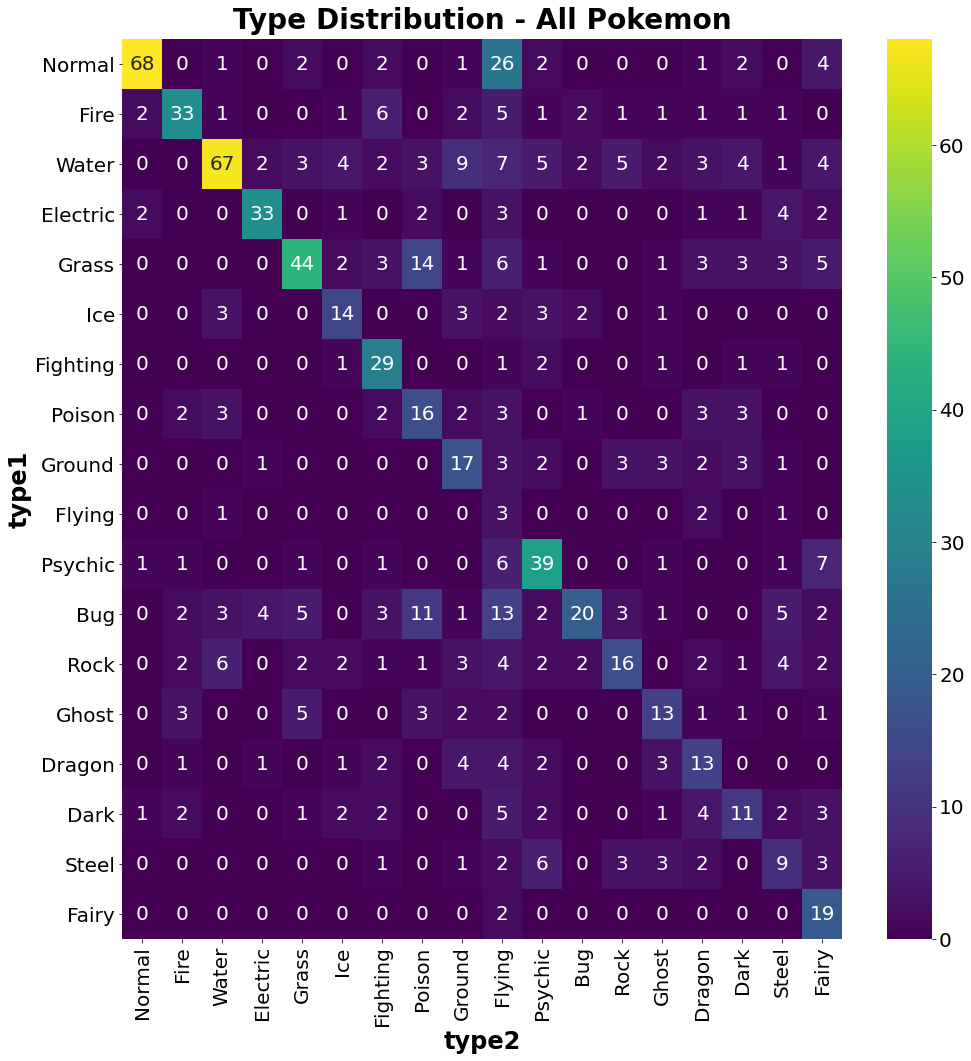

In [4]:
types_heatmap = pd.DataFrame(index = poketypes, columns = poketypes, dtype = int)

for type1 in poketypes:
    for type2 in poketypes:
        try:
            type_count = pokedex.groupby(["type1", "type2"])["name"].count().loc[type1, type2]
        except KeyError:
            type_count = 0
        types_heatmap.loc[type1, type2] = int(type_count)

types = plt.figure(1, figsize = (12.5,12.5))
types.set_facecolor("white")
ax_types = types.add_axes([0, 0, 1, 1])

sns.heatmap(types_heatmap, annot = True, cmap = "viridis")

ax_types.set_xlabel("type2", fontdict = label_font)
ax_types.set_ylabel("type1", fontdict = label_font)
ax_types.set_title("Type Distribution - All Pokemon", fontdict = title_font, pad = 10)

plt.show()

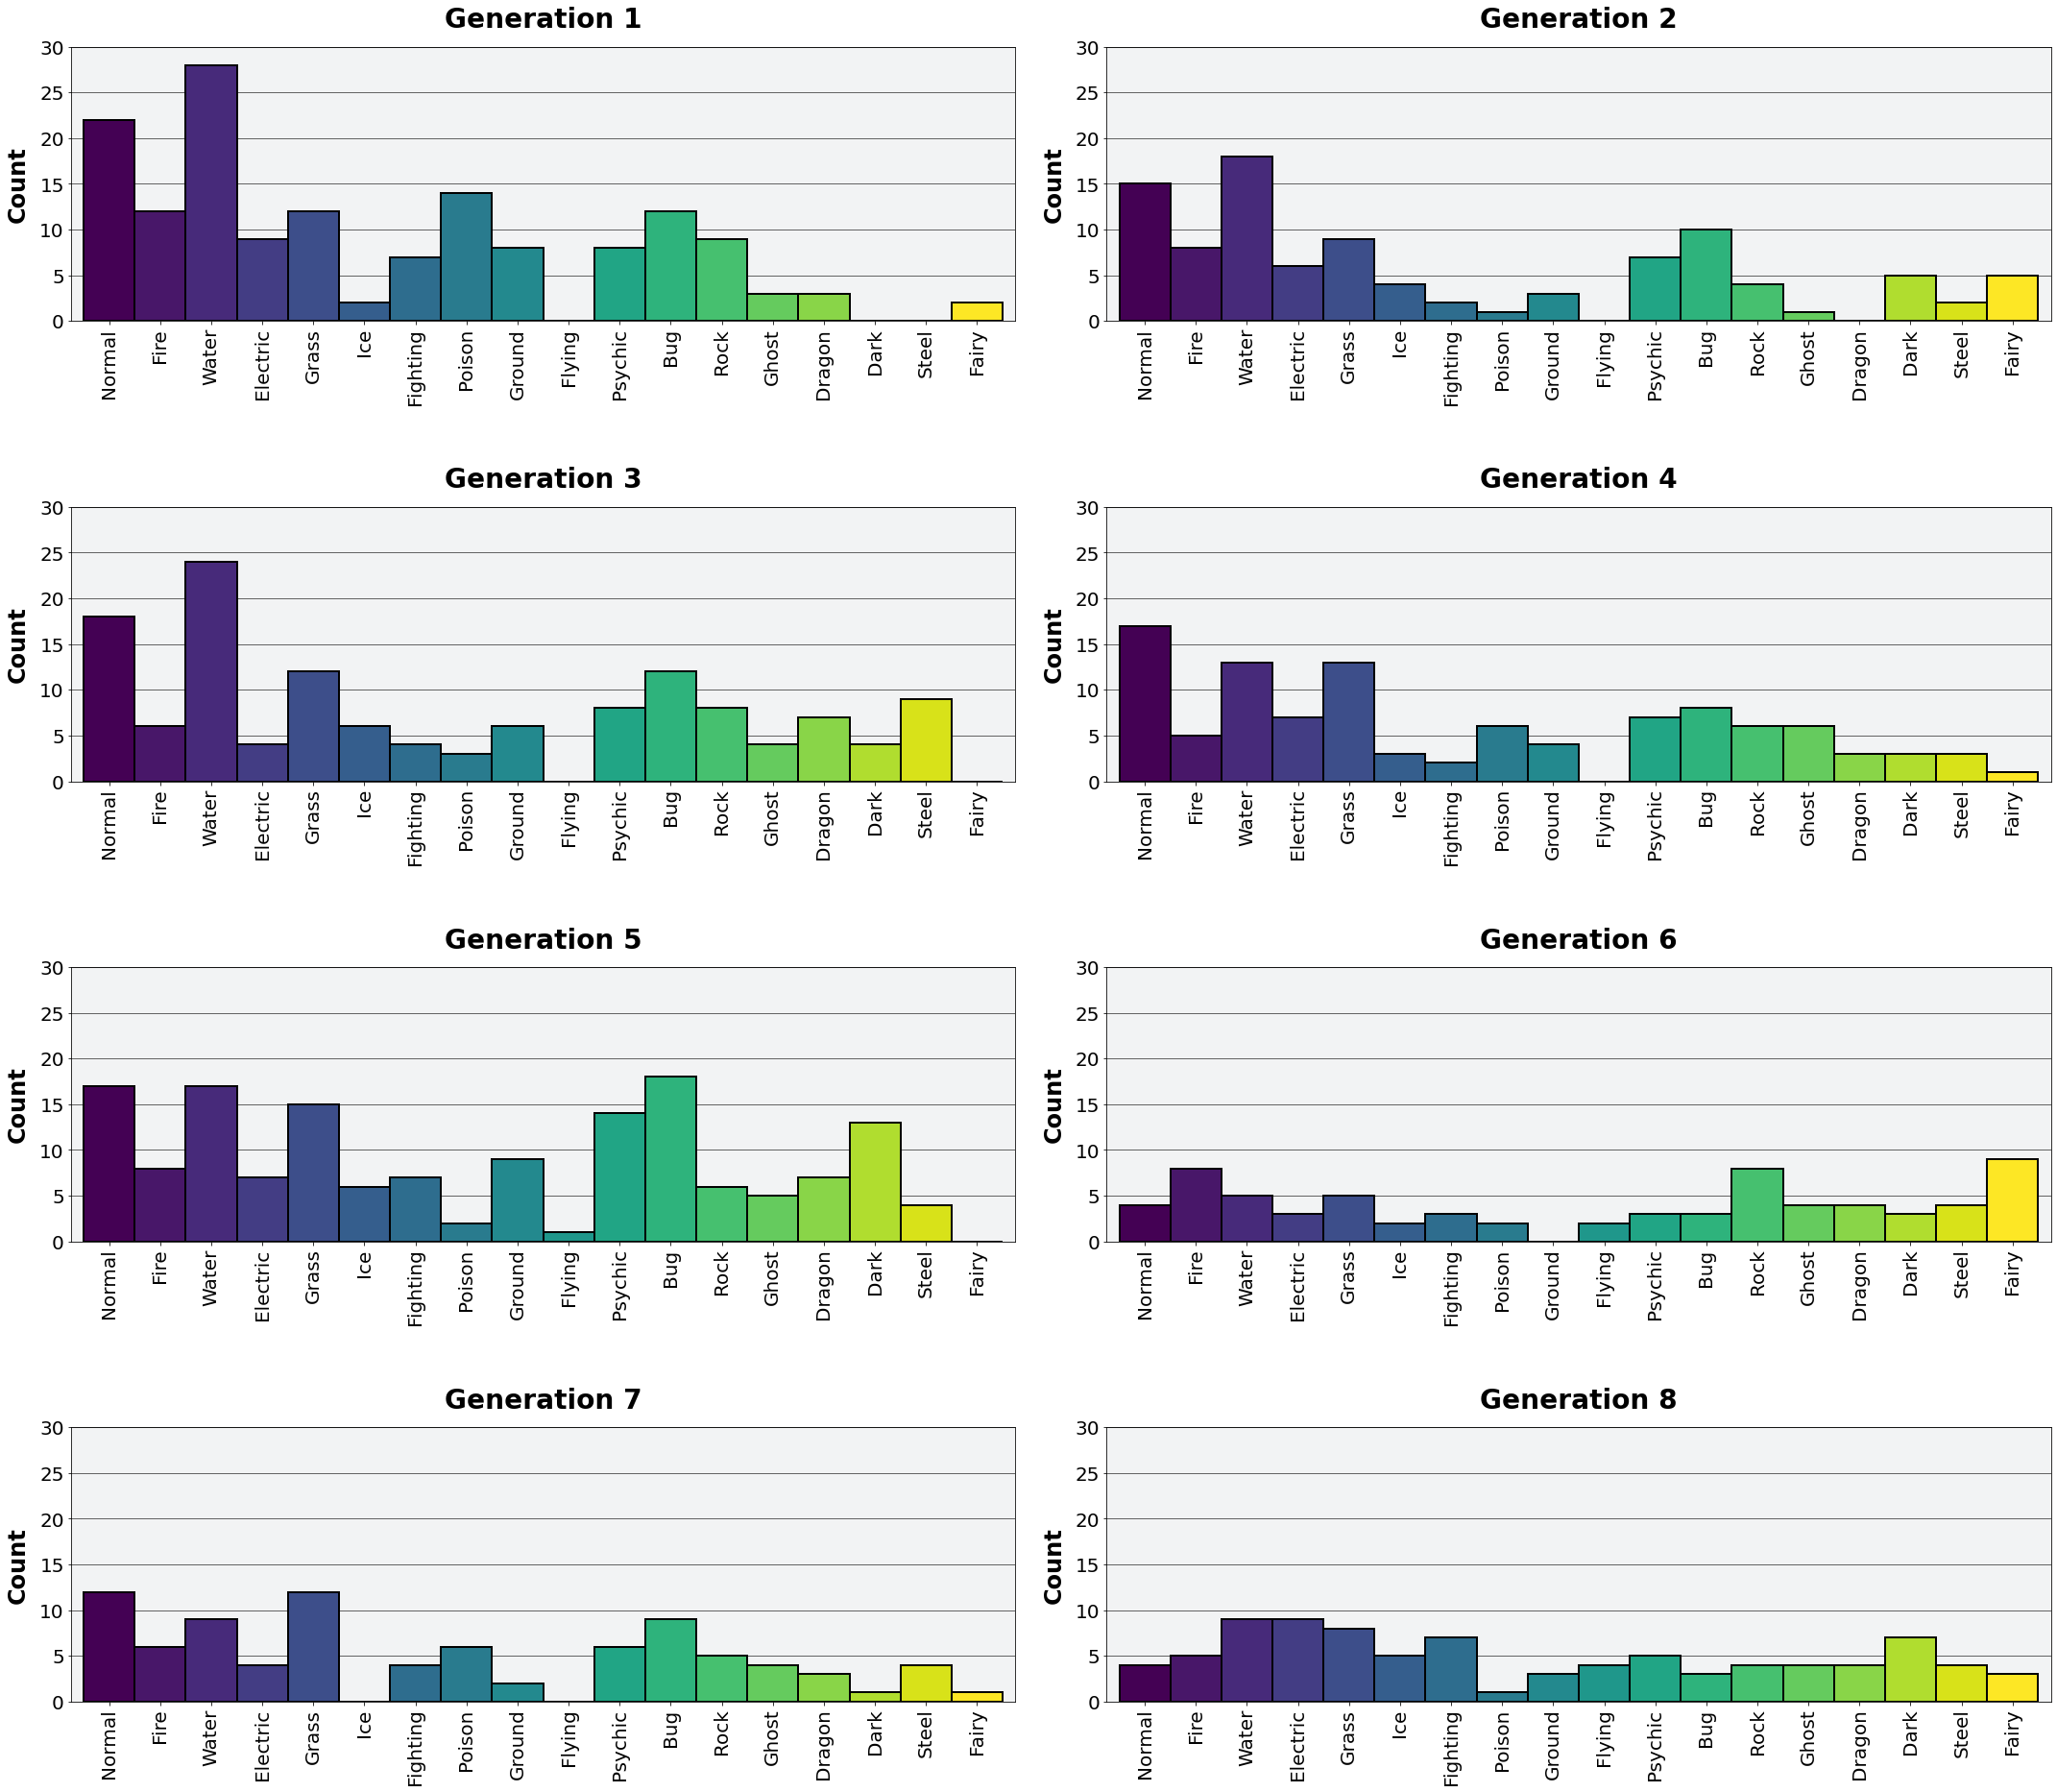

In [7]:
gens_types_data = pokedex.groupby(["generation", "type1"])["name"].count()
gens_types_graph, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (30, 25))
axes = axes.flatten()
gens_types_graph.tight_layout(h_pad = 8, w_pad = 2)
gens_types_graph.set_facecolor("w")

cmap = matplotlib.cm.get_cmap('viridis')
colors = [cmap(x) for x in np.linspace(0.0, 1.0, 18)]

for gen in range(1, 9):
    gen_types_data = gens_types_data.loc[gen]
    gen_types_data = gen_types_data.reindex(poketypes)
    
    gen_types_data.plot(kind = "bar", ax = axes[gen - 1], width = 1.0, rot = 90, 
                        ylabel = "Count", ylim = (0, 30), color = colors, 
                        linewidth = 2.0, edgecolor = "k", zorder = 3)
    
    axes[gen - 1].set_facecolor("#F2F3F4")
    axes[gen - 1].grid(axis = "y", zorder = 0, color = "#404040")
    axes[gen - 1].set_xlabel("", fontdict = label_font)
    axes[gen - 1].set_ylabel("Count", fontdict = label_font, labelpad = 10)
    
    axes[gen - 1].set_title(("Generation " + str(gen)), fontdict = title_font, pad = 20)

In [176]:
pokedex["atk - def"] = pokedex["base_attack"] - pokedex["base_defense"]
pokedex["atk + def"] = pokedex["base_attack"] + pokedex["base_defense"]

pokedex["sp_atk - sp_def"] = pokedex["base_sp_attack"] - pokedex["base_sp_defense"]
pokedex["sp_atk + sp_def"] = pokedex["base_sp_attack"] + pokedex["base_sp_defense"]

pokedex["sp_atk - atk"] = pokedex["base_sp_attack"] - pokedex["base_attack"]
pokedex["sp_def - def"] = pokedex["base_sp_defense"] - pokedex["base_defense"]

pokedex["sp - reg"] = pokedex["sp_atk + sp_def"] - pokedex["atk + def"]

pokedex["total_stats"] = pokedex["base_attack"] + pokedex["base_defense"] + pokedex["base_sp_attack"] + pokedex["base_sp_defense"] + pokedex["base_HP"] + pokedex["base_speed"]

In [177]:
pokedex.groupby(["type1"]).mean().iloc[:, 44:]

,atk - def,atk + def,total_stats,sp_atk - sp_def,sp_atk + sp_def,sp_atk - atk,sp_def - def,sp - reg
type1,,,,,,,,
Bug,-3.093333,135.600000,373.480000,-6.160000,119.600000,-9.533333,-6.466667,-16.000000
Dark,18.055556,150.666667,436.333333,3.527778,138.694444,-13.250000,1.277778,-11.972222
Dragon,21.903226,175.709677,491.193548,2.290323,158.290323,-18.516129,1.096774,-17.419355
Electric,12.285714,135.510204,434.591837,17.040816,151.530612,10.387755,5.632653,16.020408
Fairy,-5.190476,131.666667,425.904762,-9.047619,166.857143,15.666667,19.523810,35.190476
Fighting,29.638889,170.250000,427.416667,-12.527778,118.194444,-47.111111,-4.944444,-52.055556
Fire,18.689655,148.793103,443.672414,13.775862,151.500000,-1.103448,3.810345,2.706897
Flying,9.428571,133.714286,420.000000,1.571429,135.857143,-2.857143,5.000000,2.142857
Ghost,-6.548387,145.516129,433.645161,5.870968,165.354839,16.129032,3.709677,19.838710


In [200]:
single_types = pokedex[pokedex["type1"] == pokedex["type2"]]
single_types.groupby(["type1"]).mean().iloc[:, 44:]

,atk - def,atk + def,total_stats,sp_atk - sp_def,sp_atk + sp_def,sp_atk - atk,sp_def - def,sp - reg
type1,,,,,,,,
Bug,-6.750000,106.450000,294.450000,-6.500000,89.200000,-8.500000,-8.750000,-17.250000
Dark,16.909091,132.909091,408.818182,11.909091,139.363636,0.727273,5.727273,6.454545
Dragon,24.307692,155.538462,417.461538,-6.153846,129.692308,-28.153846,2.307692,-25.846154
Electric,14.848485,129.454545,423.818182,14.575758,147.000000,8.636364,8.909091,17.545455
Fairy,-1.000000,131.315789,420.736842,-8.947368,162.315789,11.526316,19.473684,31.000000
Fighting,30.827586,170.206897,417.206897,-16.206897,112.206897,-52.517241,-5.482759,-58.000000
Fire,21.757576,138.727273,415.727273,10.393939,137.727273,-6.181818,5.181818,-1.000000
Flying,23.000000,129.666667,396.666667,10.333333,123.666667,-9.333333,3.333333,-6.000000
Ghost,-11.923077,145.769231,434.384615,-3.846154,179.076923,20.692308,12.615385,33.307692


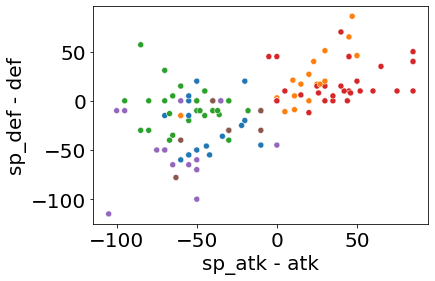

In [216]:
single_types = pokedex[pokedex["type1"] == pokedex["type2"]]

sns.scatterplot(data = single_types[single_types["type1"].isin(["Rock", "Ground", "Psychic", "Fighting", "Fairy", "Steel"])], 
                x = "sp_atk - atk", y = "sp_def - def", hue = "type1")

plt.legend([],[], frameon=False)

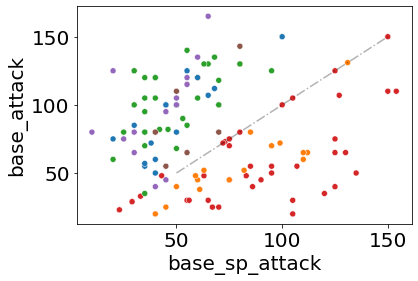

In [230]:
sns.scatterplot(data = single_types[single_types["type1"].isin(["Rock", "Ground", "Psychic", "Fighting", "Fairy", "Steel"])], 
                x = "base_sp_attack", y = "base_attack", hue = "type1")
plt.plot([50, 150], [50, 150], color = "k", ls = "-.", alpha = 0.3)

plt.legend([],[], frameon=False)

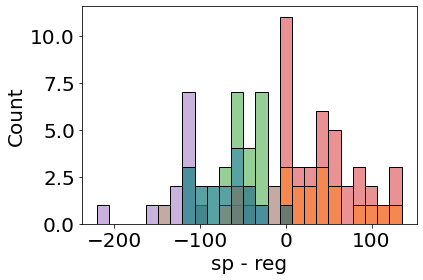

In [198]:
sns.histplot(data = single_types[single_types["type1"].isin(["Rock", "Ground", "Psychic", "Fighting", "Fairy", "Steel"])], 
                x = "sp - reg", hue = "type1", bins = 25)

plt.legend([],[], frameon=False)